In [ ]:
"""
Code Challenge
  Name: 
    Titanic Analysis
  Filename: 
    titanic.py
  Problem Statement:
      It’s a real-world data containing the details of titanic ships 
      passengers list. Import the training set "training_titanic.csv"
      
  Answer the Following:
      1.How many people in the given training set survived the disaster ?
      2.How many people in the given training set died ?
      3.Calculate and print the survival rates as proportions (percentage) 
        by setting the normalize argument to True.
      
      4.Males that survived vs males that passed away
      5.Females that survived vs Females that passed away
      
      6.Does age play a role? since it's probable that children were saved first.

      7.You can test this by creating a new column with a categorical variable Child. 
        Child will take the value 1 in cases where age is less than 18, 
        and a value of 0 in cases where age is greater than or equal to 18.
 
      Then assign the value 0 to observations where the passenger 
      is greater than or equal to 18 years in the new Child column.
      Compare the normalized survival rates for those who are <18 and 
      those who are older. 
    
      To add this new variable you need to do two things
        1. create a new column, and
        2. Provide the values for each observation (i.e., row) based on the age of the passenger.
  Hint: 
      To calculate this, you can use the value_counts() method in 
      combination with standard bracket notation to select a single column of
      a DataFrame   
"""


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data= pd.read_csv("pd_csv/training_titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 1.How many people in the given training set survived the disaster ?
# 2.How many people in the given training set died ?

survived= data['Survived'].value_counts()  # 0 for died and 1 for survived

print('Died passenger:', survived[0] )
print('Survived passenger:', survived[1] )


# 3.Calculate and print the survival rates as proportions (percentage) 
#   by setting the normalize argument to True.
per_sur= data['Survived'].value_counts(normalize= True)*100

print('Died passenger:', round(per_sur[0],3),'%' )
print('Survival percentage:', round(per_sur[1],3),'%' )


Died passenger: 549
Survived passenger: 342
Died passenger: 61.616 %
Survival percentage: 38.384 %


In [62]:
# 4.Males that survived vs males that passed away
# 5.Females that survived vs Females that passed away

df= pd.DataFrame()
df= data.groupby(['Survived','Sex']).size()
print( df )
print()
print('Male Survived: ',df[1]['male']) 
print('Male passed away: ',df[0]['male']) 
print()
print('Female Survived: ',df[1]['female']) 
print('Female passed away: ',df[0]['female']) 


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

Male Survived:  109
Male passed away:  468

Female Survived:  233
Female passed away:  81


In [5]:
'''Or'''
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

print('0 for died and 1 for survived.\n')
df= pd.crosstab(data['Survived'],data['Sex'])
df

# df['male'][0]
# df['female']


0 for died and 1 for survived.



Sex,female,male
Survived,,
0,81,468
1,233,109


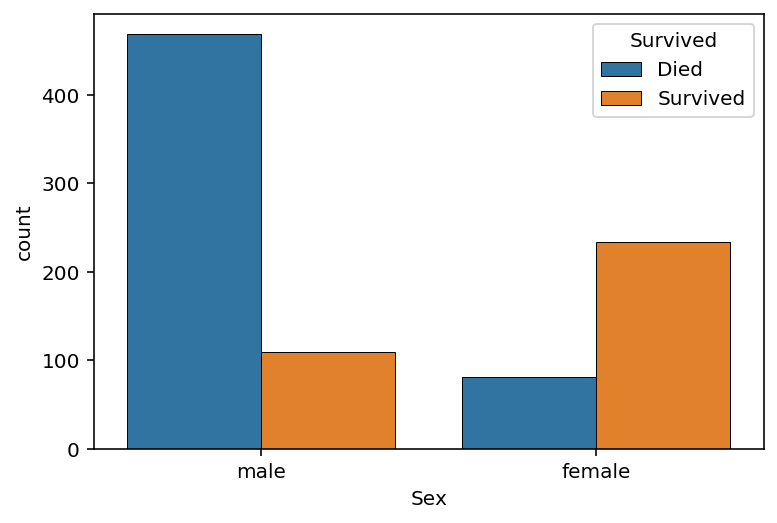

In [84]:
'''Or'''
bar= sns.countplot(x='Sex', hue='Survived', data=data, edgecolor=(0,0,0), linewidth=0.5 )

leg = bar.get_legend()
labs = leg.texts
labs[0].set_text("Died")
labs[1].set_text("Survived")

bar.get_figure().savefig('graph/gender_survived.png')


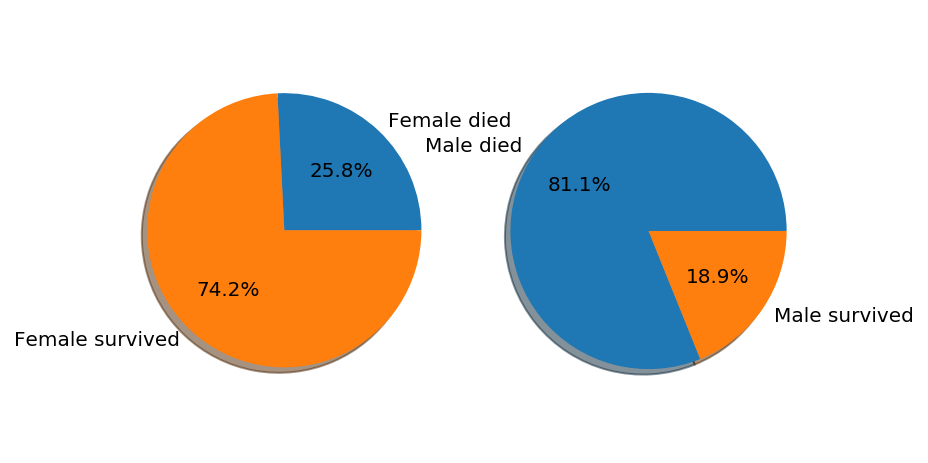

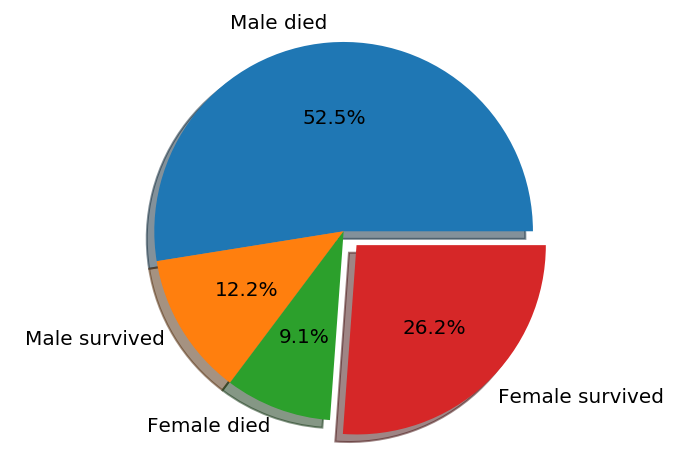

In [83]:
axs = plt.subplot(121)
axs.set_aspect(1)

plt.pie([df['female'][0], df['female'][1] ], explode=(0,0), labels= ['Female died', 'Female survived'],shadow=True, autopct= '%1.1f%%' )
plt.axis('equal')

plt.subplot(122)

plt.pie([df['male'][0], df['male'][1] ], explode=(0,0), labels= ['Male died', 'Male survived'],shadow=True, autopct= '%1.1f%%' )
plt.axis('equal')
plt.show()

plt.pie([df['male'][0], df['male'][1], df['female'][0], df['female'][1] ], explode=(0,0,0,0.1), labels= ['Male died', 'Male survived','Female died', 'Female survived'],shadow=True, autopct= '%1.1f%%' )
plt.axis('equal')
plt.show()


In [74]:
male= data[(data['Sex']=='male') & (data['Survived']==1)].count()
male


PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

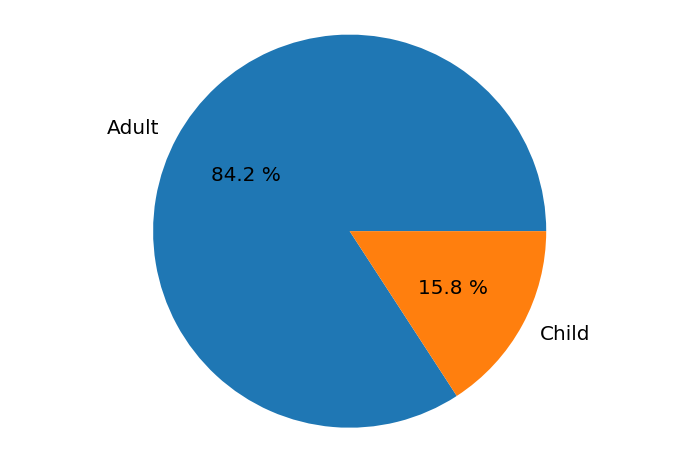

In [41]:
#6.Does age play a role?
#  since it's probable that children were saved first.

data['Child']= data['Age'].dropna()<18
data.head(10)

child_count= data['Child'].value_counts()
child_vis= plt.pie([child_count[0], child_count[1] ], explode= (0,0), labels= ['Adult','Child'] , autopct= '%1.1f %%' )
plt.axis('equal')
plt.show()


In [30]:
df2= data.groupby(['Survived','Child']).size()
print(df2)
print()

child_sur= (df2[1][True]*100)/( data['Child'].value_counts()[True])
old_sur= (df2[1][False]*100)/( data['Child'].value_counts()[False])

# age matters as child survival rate is greater than other
print('Child survival rate:',round(child_sur,2),'%')
print('Other people survival rate:',round(old_sur,2),'%')


Survived  Child
0         False    372
          True      52
1         False    229
          True      61
dtype: int64

Child survival rate: 53.98 %
Other people survival rate: 38.1 %


In [55]:
tab= pd.crosstab( data['Survived'], data['Child'])
tab

Child,False,True
Survived,,
0,372,52
1,229,61


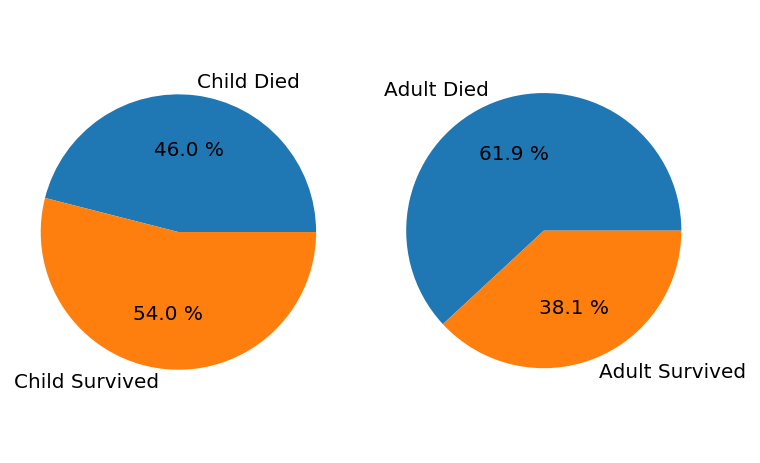

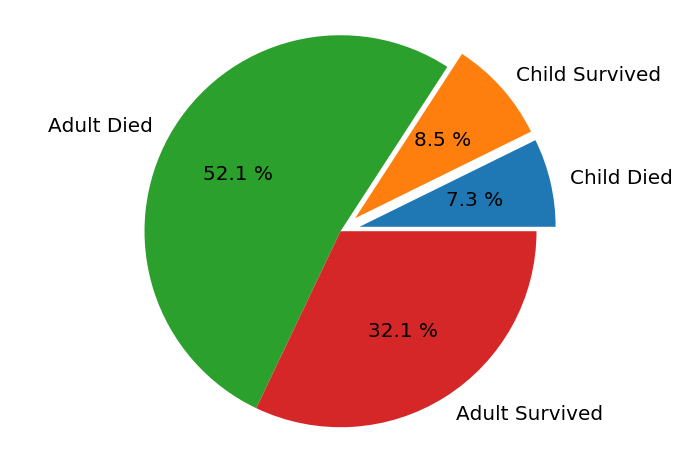

In [96]:
fig = plt.figure()

axs = plt.subplot(121)
axs.set_aspect(1)

## True for Child and False for Adult
## 0 for Died and 1 for Survived
plt.pie([ tab[True][0], tab[True][1] ], explode= (0,0), labels= ['Child Died','Child Survived'] , autopct= '%1.1f %%' )
plt.axis('equal')

plt.subplot(122)
plt.pie([ tab[False][0], tab[False][1] ], explode= (0,0), labels= ['Adult Died','Adult Survived'] , autopct= '%1.1f %%' )
plt.axis('equal')
plt.show()
fig.savefig('plot1.png')


fig = plt.figure()
plt.pie([tab[True][0], tab[True][1], tab[False][0], tab[False][1] ], explode= (0.1,0.1,0,0), labels= ['Child Died','Child Survived','Adult Died','Adult Survived'] , autopct= '%1.1f %%' )
plt.axis('equal')
plt.show()

fig.savefig('plot2.png')


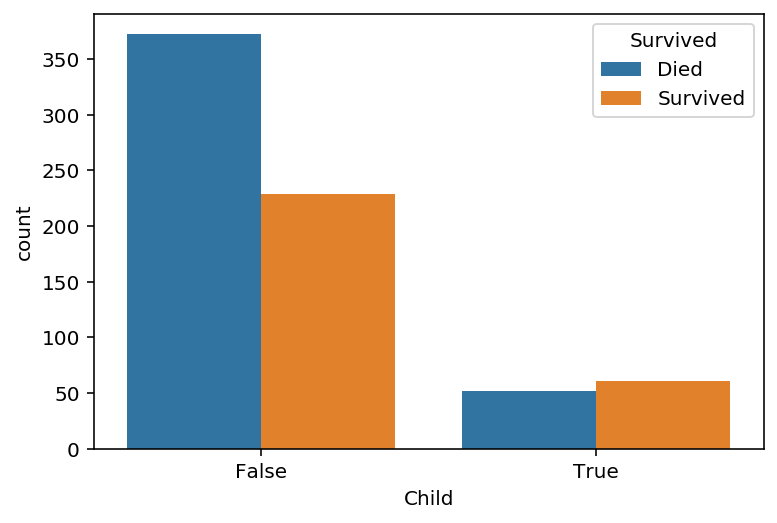

In [85]:
bar= sns.countplot(x='Child', hue= 'Survived' ,data= data  )

# set labels of legend
leg = bar.get_legend()
labs = leg.texts
labs[0].set_text("Died")
labs[1].set_text("Survived")

# l= bar.axes.xaxis.label.set_text("Count")  ## to set label of x axis

bar.get_figure().savefig('graph/child_survived.png')
